# Protein Secondary Structure Prediction
reference : https://www.ijcai.org/Proceedings/16/Papers/364.pdf

git : https://github.com/takatex/pytorch-protein-secondary-structure-prediction

In [1]:
import os, sys
sys.path.append('../src/')
import numpy as np
import glob
import pandas as pd

from model import Net
from data import *
from visualize import *

% matplotlib inline
% load_ext autoreload
% autoreload 2

## Data visualization

### data loader for data visualization

In [2]:
D = LoadDataset(batch_size_train=6048, batch_size_test=1)
idxs = np.arange(D.__len__())
data_loader, _ = D([idxs, idxs])

In [3]:
data, target, seq_len = next(iter(data_loader))
data, target, seq_len = data.data.numpy(), target.data.numpy(), seq_len.data.numpy()

### sequence length

max:700, min:12, mean:209


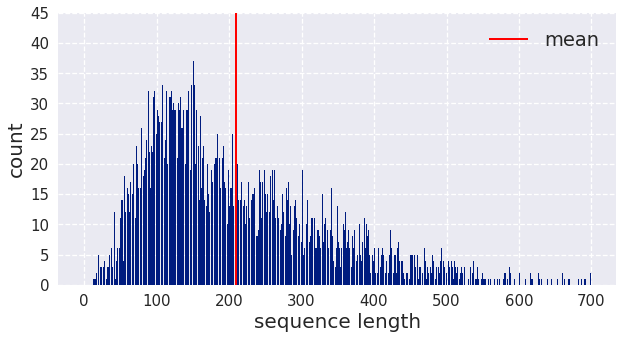

In [4]:
print(f'max:{seq_len.max()}, min:{seq_len.min()}, mean:{seq_len.mean().astype(int)}')
seq_len_plot(seq_len)

### rate of amino acid residues

In [5]:
amino_rate = np.zeros(8)
for t, l in zip(target, seq_len):
    t = t[:l]
    keys, values = amino_count(t)
    amino_rate[keys] += values
amino_rate /= seq_len.sum()

NameError: name 'amino_count' is not defined

In [ ]:
amino_rate_plot(amino_rate)

## Network

In [ ]:
Net()

## Result

### history plot

In [ ]:
result_path = '../data/result_201808052028'
history_path = glob.glob(os.path.join(result_path, 'history*'))

# history : (train_loss, test_loss, acc)
history = np.array([np.load(h_path) for h_path in history_path])

In [ ]:
for h, h_path in zip(history, history_path):
    title, _ = os.path.basename(h_path).split('.')
    print(title)
    history_plot(h.T, title=title, show=True, save=False, save_path='')

### Accuracy

In [ ]:
acc = np.array([max(h.T[2]) for h in history])
df_acc = pd.DataFrame({'acc' : acc,
                       'model' : 'CNN-BGRU'})

In [ ]:
acc_plot(df_acc)

In [ ]:
path = os.path.join(result_path, 'acid_acc.npy')
acc_each = np.load(path)
keys = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T']
df = pd.DataFrame({'acc' : acc_each.reshape(-1),
                   'amino_acid' : keys * 10})

In [ ]:
acc_each

In [ ]:
df

In [ ]:
acc_each_plot(df)